In [63]:
import pandas as pd
import naas
import os
from PIL import Image, ImageDraw, ImageFont
from datetime import date

# WHI - 
<a href="https://app.naas.ai/user-redirect/naas/downloader?url=https://raw.githubusercontent.com/jupyter-naas/awesome-notebooks/master/WHI/WHI.ipynb" target="_parent">
<img src="https://img.shields.io/badge/-Open%20in%20Naas-success?labelColor=000000&logo="/>
</a>

In [34]:
weights = {}
for filename in os.listdir('output/'):
    df = pd.read_csv(f'output/{filename}')
    weights[df['INDICATOR'].values[0]] = 1

In [35]:
weights

{'COVID-19 Active Cases': 1, 'Sea Level': 1}

In [56]:
weights = {'COVID-19 Active Cases': 4, 
           'Sea Level': 2
          }

In [57]:
weights

{'COVID-19 Active Cases': 4, 'Sea Level': 2}

In [58]:
df = None
for filename in os.listdir('output/'):
    if df is not None:
        row = pd.read_csv(f'output/{filename}')
        ind = row['INDICATOR'].values[0]
        row['WEIGHT'] = weights[ind]
        df = df.append(row)
    else:
        df = pd.read_csv(f'output/{filename}')
        ind = df['INDICATOR'].values[0]
        df['WEIGHT'] = weights[ind]

# Output - Weighted Average to create WHI

In [59]:
df

,Unnamed: 0,DATE_PROCESSED,INDICATOR,VALUE,WEIGHT
0,0,2021-05-28,COVID-19 Active Cases,0.210000,4
0,0,2021-05-28,Sea Level,4.951165,2


In [70]:
def whi(df):
    return round((df['VALUE']*df['WEIGHT']).sum() / df['WEIGHT'].sum(), 2)
def createOutput(value, datetime):
    img = Image.open("layout.png")
    d = ImageDraw.Draw(img)
    
    font = ImageFont.truetype('ArchivoBlack-Regular.ttf', 90)
    fill = (255,255,255)
    
    d.text((50,900), "{indicator}/10, {date}".format(date=datetime.strftime("%d/%m/%Y"), indicator=value), font=font, fill=fill)

    return img

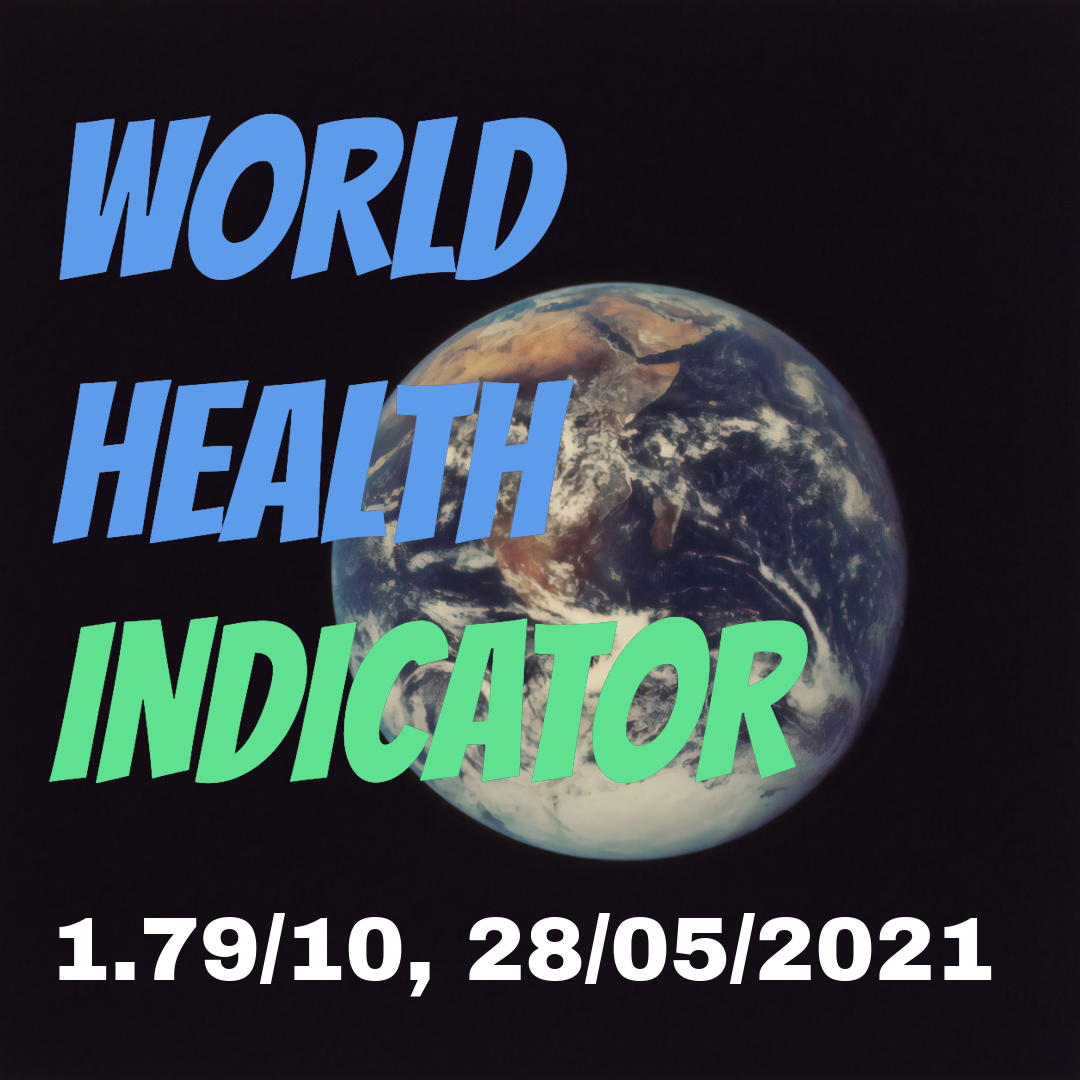

In [71]:
img = createOutput(f'{whi(df)}' , date.today())
display(img)